In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# popular Python visualization librar

In [3]:
import warnings #Warnings are not the same as errors — they don’t stop your program, but they inform you that something may not work in the future or could be problematic.
warnings.filterwarnings("ignore")#The filterwarnings function controls whether warnings are shown or hidden.
#"ignore" is one of several options 
sns.set(style="whitegrid")#Set Seaborn plots to have a clean white background with a grid.

In [4]:
dataset=pd.read_csv(r"D:\dataset\fraudDetection\AIML Dataset.csv")

In [5]:
dataset.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
dataset.shape

(6362620, 11)

In [7]:
dataset.info() #a Pandas DataFrame method that gives you a quick summary of your dataset’s structure.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
dataset["isFraud"].value_counts() #gives total count

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
dataset["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
dataset.isnull().sum() #gives total number of null values as per columns

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
dataset.isnull().sum().sum() #total number of null value in the entire dataset

np.int64(0)

In [13]:
round((dataset["isFraud"].value_counts()[1]/dataset.shape[0])*100,2)
#dataset.shape[0] → total number of rows in the dataset (total transactions).
#Percentage (in decimal form) of fraud cases in the dataset.

np.float64(0.13)

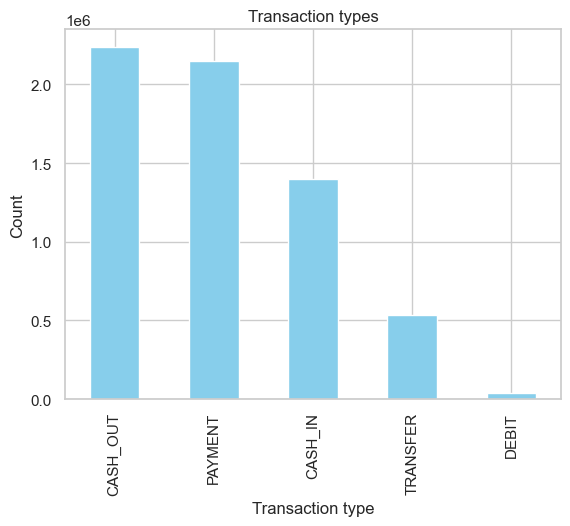

In [14]:
dataset["type"].value_counts().plot(kind="bar",title="Transaction types",color="skyblue")
plt.xlabel("Transaction type")
plt.ylabel("Count")
plt.show()


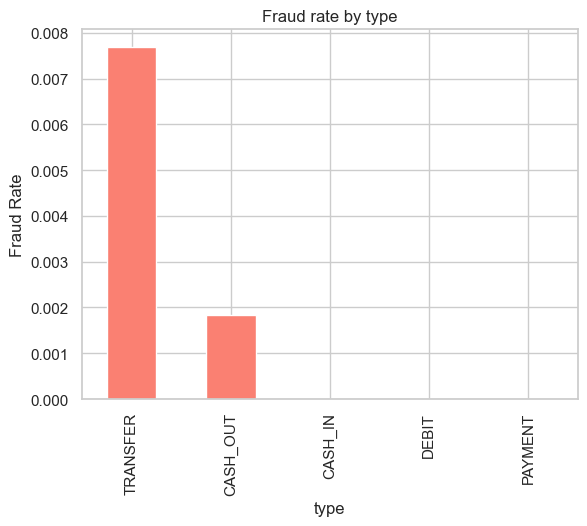

In [15]:
#finding the average fraud rate for each transaction type and sorting the results from highest to lowest
fraudByType=dataset.groupby("type")["isFraud"].mean().sort_values(ascending=False)
#Groups the dataset by the column type.After grouping, we focus only on the isFraud column in each group.Takes the mean of isFraud within each group
fraudByType.plot(kind="bar",title="Fraud rate by type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [16]:
dataset["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

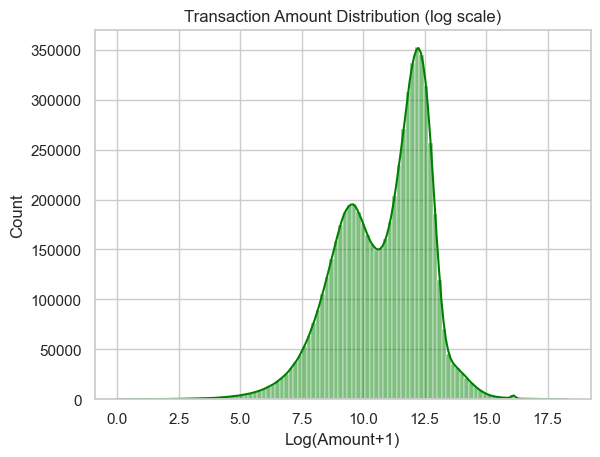

In [17]:
#This is Seaborn’s function to draw a histogram (frequency plot) of values.
sns.histplot(np.log1p(dataset["amount"]),bins=100,kde=True,color="green")
#np.log1p(dataset["amount"]) → the transformed transaction amounts.np.log1p(x) computes log(x + 1)
#bins=100 → split the range into 100 intervals.
#kde=True → add a smooth KDE (Kernel Density Estimate) curve on top, showing the probability density
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount+1)")
plt.show()

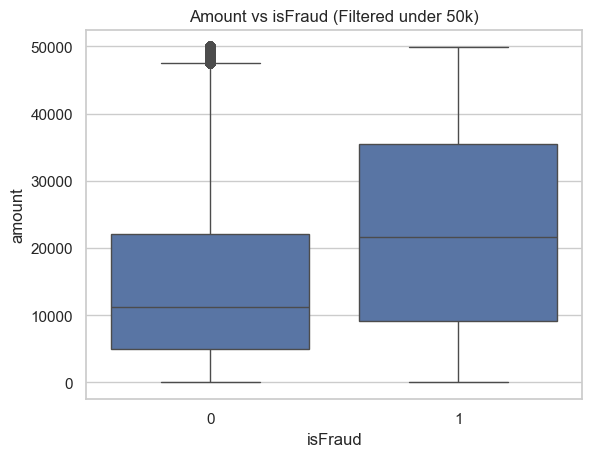

In [18]:
sns.boxplot(data=dataset[dataset["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [21]:
dataset["balanceDiffOrg"]=dataset["oldbalanceOrg"]-dataset["newbalanceOrig"]
dataset["balanceDiffDest"]=dataset["newbalanceDest"]-dataset["oldbalanceDest"]

In [23]:
(dataset["balanceDiffOrg"]<0).sum() #no of negative values

np.int64(1399253)

In [24]:
(dataset["balanceDiffDest"]<0).sum()

np.int64(1238864)